<a href="https://colab.research.google.com/github/Rutuja-bharambe/student-depression-model/blob/main/ML_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files

uploaded = files.upload()

Saving cleaned_student_depression_dataset.csv to cleaned_student_depression_dataset.csv


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# Load the data
data = pd.read_csv('cleaned_student_depression_dataset.csv')


In [15]:
# Drop rows with missing Financial Stress values
data_cleaned = data.dropna(subset=['Financial Stress'])


In [18]:
#Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits',
                    'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [19]:
for col in categorical_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])


<ipython-input-19-3ee8de7537d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
<ipython-input-19-3ee8de7537d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])
<ipython-input-19-3ee8de7537d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [21]:
 #Define features and target
X = data_cleaned.drop(columns=['Depression'])
y = data_cleaned['Depression']


In [22]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [25]:
# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


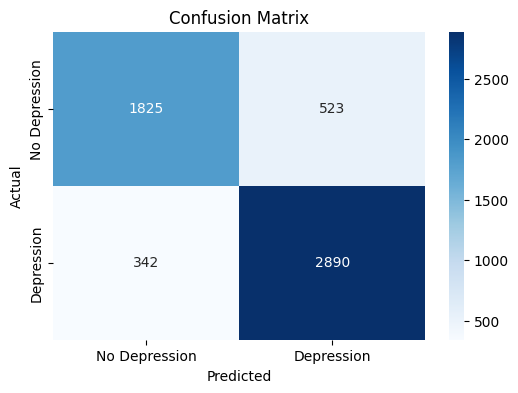

In [26]:
# Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
 #ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


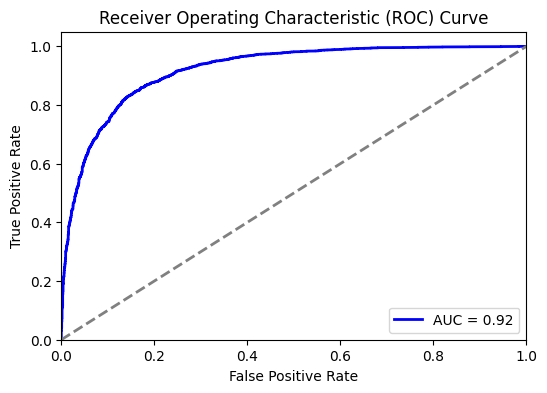

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:

# Classification report
print(classification_report(y_test, y_pred))

# Feature importance
importance = model.coef_[0]
features = X.columns

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.84      0.84      0.84      5580



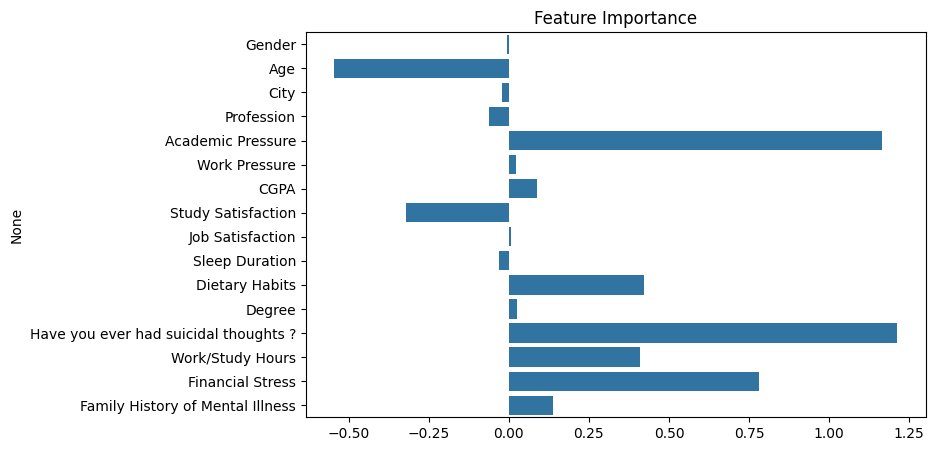

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x=importance, y=features)
plt.title('Feature Importance')
plt.show()
